In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from gaiaxpy import calibrate

## Candidate Sy

In [2]:
df1 = pd.read_csv("./gaia/XP_CONTINUOUS_COMBINED.csv")
symbad = pd.read_csv("./symbad/suspected_SY_news.csv", dtype={'Gaia DR3': 'int64'})

sy_calibrated_spectra, sampling = calibrate(df1, save_file=False)

symbad = symbad.dropna(subset=['Gaia DR3'])

In [3]:
df_filtered = sy_calibrated_spectra.merge(symbad, left_on=['source_id'], right_on=['Gaia DR3'], how='inner',
                                          indicator=True)

In [4]:
out_dir = './plot/Sy'
if not os.path.exists(out_dir):
    os.mkdir(out_dir)


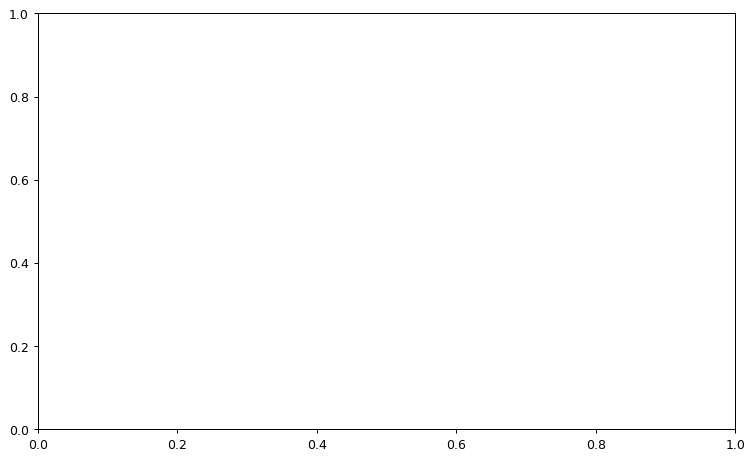

In [5]:
# Establecer el tamaño grande de la figura en pulgadas (ancho x altura)
fig, ax = plt.subplots(figsize=(10, 6), dpi=90)

for index, row in df_filtered.iterrows():
    # Create line plot
    ax.plot(sampling, row['flux'], c='blue')
    star_name = row['FIND_NAME']
    # Set labels and title
    ax.set_title(star_name, fontsize=14)
    ax.set_xlabel('Wavelength', fontsize=13)
    ax.set_ylabel('Flux', fontsize=13)

    # filename = f'{star_name}.png'
    # fullname = os.path.join(out_dir, filename)

    # Guarda la imagen en disco
    plt.savefig(os.path.join(out_dir, f'{star_name}.png'), format='png')
    plt.savefig(os.path.join(out_dir, f'{star_name}.svg'), format="svg")

    # Limpia el gráfico para el siguiente registro
    ax.clear()

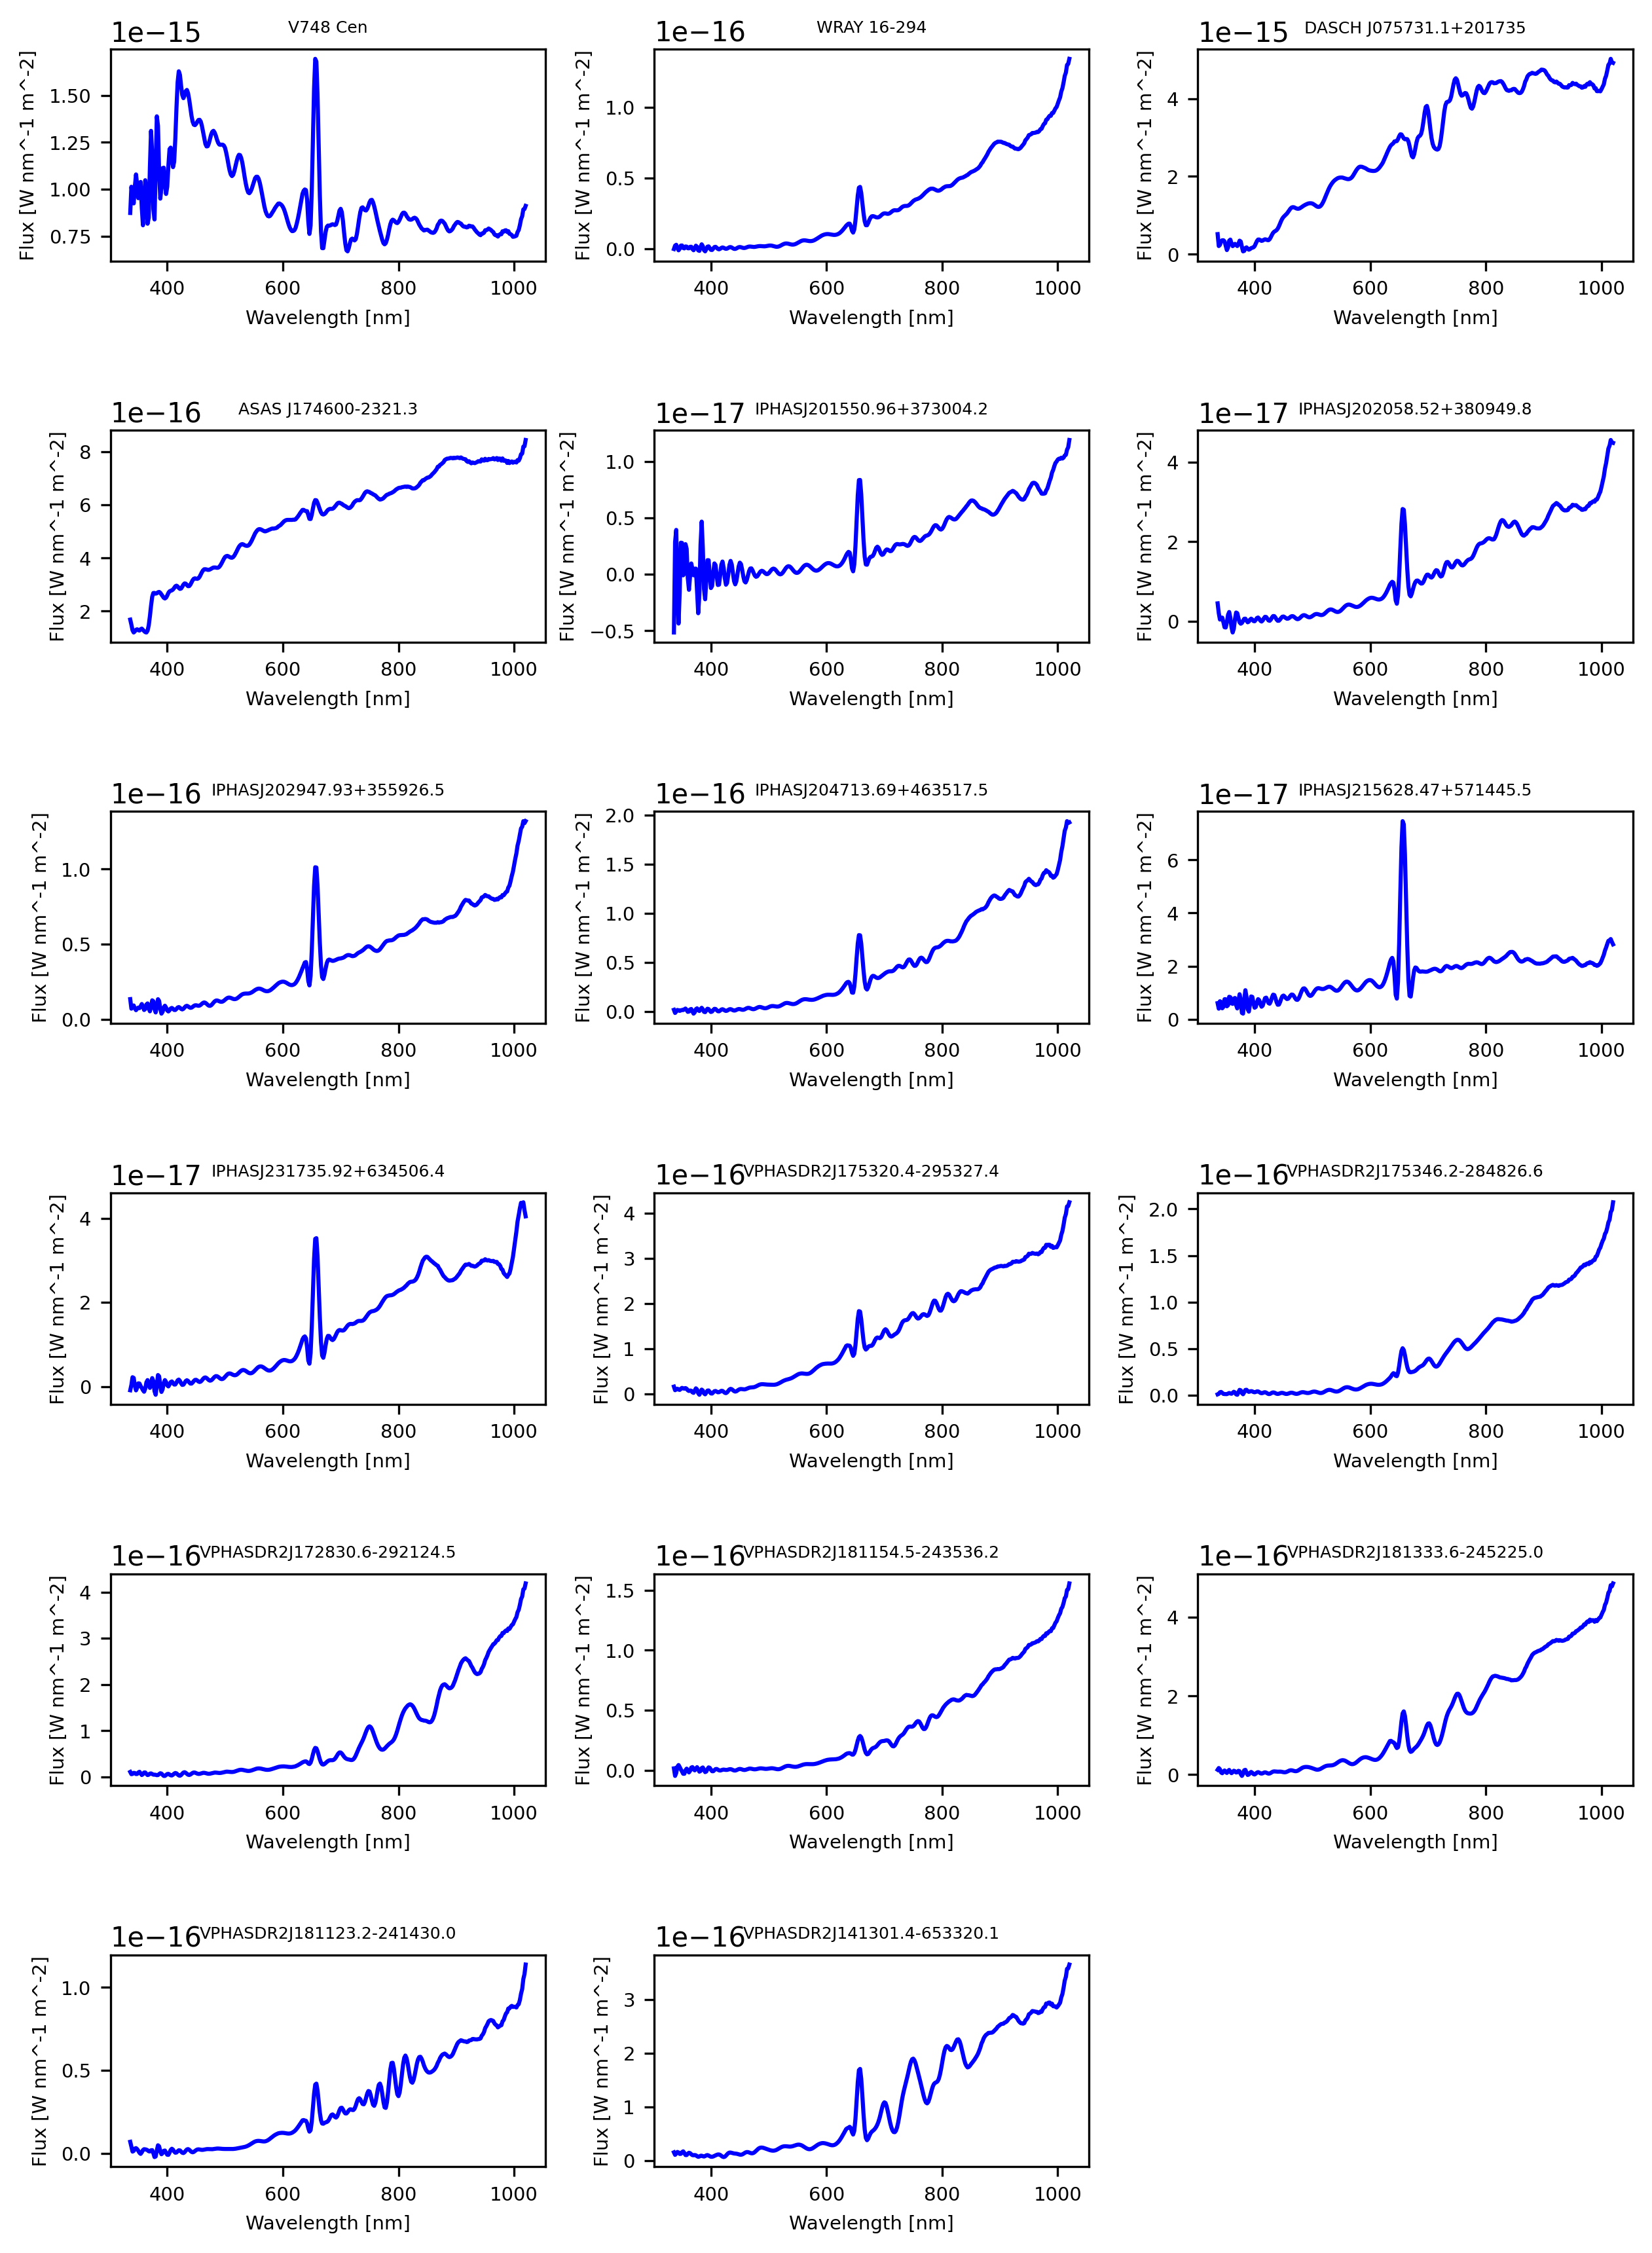

In [12]:
columns = 3
rows = 6

fig, ax = plt.subplots(rows, columns, figsize=(10, 14), dpi=300, gridspec_kw={'hspace': 0.8, 'wspace': 0.25})

for index, row in df_filtered.iterrows():
    # Create line plot
    star_name = row['FIND_NAME']
    i = (index % columns)
    j = int(index / columns)

    ax[j, i].plot(sampling, row['flux'], c='blue')
    ax[j, i].set_title(star_name, fontsize=6)
    ax[j, i].set_xlabel('Wavelength [nm]', fontsize=7)
    ax[j, i].set_ylabel('Flux [W nm^-1 m^-2]', fontsize=7)
    ax[j, i].tick_params(axis='x', labelsize=7)
    ax[j, i].tick_params(axis='y', labelsize=7)
    ax[j, i].tick_params(axis='both', labelsize=7)

ax[5, 2].axis('off')

plt.savefig(os.path.join(out_dir, 'combined.svg'), format="svg")
plt.show()